In [61]:
import holoviews as hv
import pandas as pd

In [62]:
exchangeList = ['bitFlyer', 'coincheck', 'quoine', 'Zaif']

In [63]:
csv_data = []
fiveMinChange = []
i = 0
for exchange in exchangeList:
    csv_data.append(pd.read_csv('./marketHistory_'+ exchange +'.csv'))
    fiveMinDatetime = []
    fiveMinPriceChange = []
    j = 5
    max_j = len(csv_data[i]['timestamp'].values.tolist())
    while j < max_j:
        fiveMinDatetime.append(csv_data[i]['timestamp'].values.tolist()[j])
        fiveMinPriceChange.append((csv_data[i]['mid'].values.tolist()[j]-csv_data[i]['mid'].values.tolist()[j-5])/csv_data[i]['mid'].values.tolist()[j-5]*100)
        j = j+1
    fiveMinChange.append([fiveMinDatetime, fiveMinPriceChange])
    i = i+1

In [64]:
hv.extension('matplotlib')
curve = hv.Curve(([], []))

In [65]:
i = 0
for exchange in exchangeList:
    curveItem = hv.Curve((pd.to_datetime(fiveMinChange[i][0]), fiveMinChange[i][1]), label = exchange)
    curve = curve * curveItem
    i = i+1

:Overlay
   .Curve.I         :Curve   [x]   (y)
   .Curve.BitFlyer  :Curve   [x]   (y)
   .Curve.Coincheck :Curve   [x]   (y)
   .Curve.Quoine    :Curve   [x]   (y)
   .Curve.Zaif      :Curve   [x]   (y)
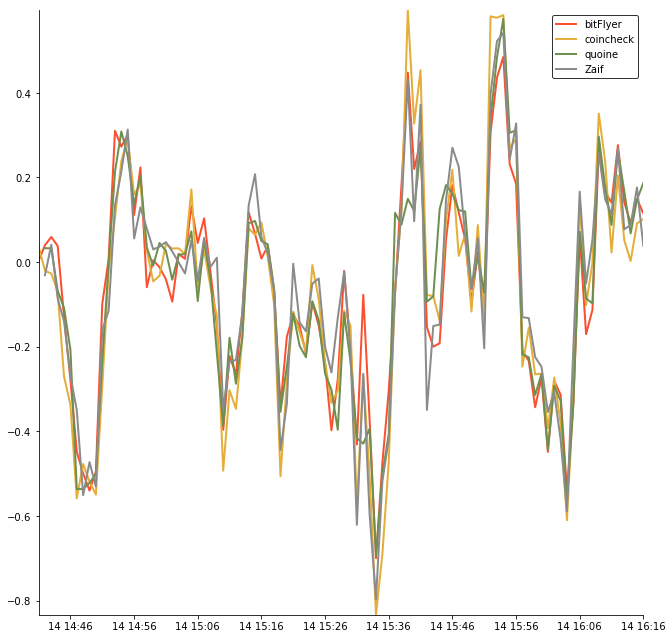

In [67]:
%%output size = 300
curve